# Práctica 4

Realizar los ejercicios de las notas (en papel excepto en los ejercicios que explícitamente se mencione se hagan en computadora en la nota correspondiente):

+ Propedeutico/R/clases/2_probabilidad/1_elementos_de_probabilidad.ipynb
+ Propedeutico/R/clases/2_probabilidad/2_propiedades_de_la_probabilidad.ipynb
+ Propedeutico/R/clases/2_probabilidad/3_metodos_de_conteo.ipynb
+ Propedeutico/R/clases/2_probabilidad/4_probabilidad_condicional.ipynb
+ Propedeutico/R/clases/2_probabilidad/5_independencia.ipynb
+ Propedeutico/R/clases/2_probabilidad/6_teorema_de_Bayes.ipynb
+ Propedeutico/R/clases/2_probabilidad/7_variables_aleatorias.ipynb

Leer, ejecutar y proponer sus propios ejemplos de uso de lenguaje para los ejemplos (en computadora):

+ Propedeutico/R/clases/1_introduccion/2_core_R.ipynb
+ Propedeutico/R/clases/1_introduccion/3_ggplot2.ipynb

In [1]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

In [2]:
install.packages('prob')
library(prob)

package 'prob' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpgpynSy\downloaded_packages


Warning message:
"package 'prob' was built under R version 3.6.1"Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Warning message:
"package 'fAsianOptions' was built under R version 3.6.1"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.1"Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.6.1"Loading required package: fOptions
Warning message:
"package 'fOptions' was built under R version 3.6.1"
Attaching package: 'prob'

The following objects are masked from 'package:base':

    intersect, setdiff, union



In [3]:
install.packages('ggplot2')
library(ggplot2)

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpgpynSy\downloaded_packages


## Parte 1: 1_elementos_de_probabilidad

### Ejemplos

### ¿Cómo representar en R un espacio de probabilidad?

Una opción para responder esta pregunta es considerar un objeto, `S`, que represente los *outcomes* o resultados del experimento y un vector de probabilidades, `probs`, con entradas que correspondan a cada outcome en `S`.

Además en el paquete *prob* se tiene una función `probspace` que tiene por argumentos $x$ que es un espacio muestral de los outcomes y $probs$ es un vector del mismo tamaño que el número de outcomes en $x$.

#### 1) Lanzamiento de un dado justo

In [4]:
outcomes <- rolldie(1)
p <- rep(1/6, times = 6)
probspace(outcomes, probs = p)
#y es equivalente sólo haber ejecutado: 
#probspace(1:6, probs = p) o bien probspace(1:6) o rolldie(1, makespace = TRUE)

X1,probs
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


#### 2) Lanzamiento de una moneda cargada

Supóngase que $P(\{\text{sol}\}) = .7$ y $P(\{\text{águila}\}) = .3$ entonces:

In [5]:
probspace(tosscoin(1), probs = c(0.70, 0.30))

toss1,probs
H,0.7
T,0.3


**Ejercicio:** ¿cómo calcular la probabilidad anterior con la función `urnsamples`?

En el paquete *prob* se tiene la función *urnsamples* la cual tiene argumentos $x, size, replace, ordered$. El argumento $x$ representa la urna de la cual se realizará el muestreo, $size$ representa el tamaño de la muestra, $replace$ y $ordered$ son argumentos lógicos y especifican cómo se debe realizar el muestreo.

One sample space function that does NOT have a makespace option is the urnsamples() function. This was intentional. The reason is that under the varied sampling assumptions the outcomes in the respective sample spaces are NOT, in general, equally likely. It is important for the user to carefully consider the experiment to decide whether or not the outcomes are equally likely, and then use probspace() to assign the model.
https://cran.r-project.org/web/packages/prob/vignettes/prob.pdf

Documentación de Probspace:
https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/probspace

Documentación de Urnsamples:
https://www.rdocumentation.org/packages/prob/versions/1.0-1/topics/urnsamples

In [6]:
#inicializando la "urna", que serían los valores de la moneda
x <- c('Sol', 'Aguila')
muestra<-urnsamples(x, 1)
muestra

out
Sol
Aguila


In [7]:
probspace(muestra,probs = c(0.70, 0.30))

out,probs
Sol,0.7
Aguila,0.3


## Parte 1: 2_propiedades_de_la_probabilidad

### Ejercicios (a mano)

Calcula las siguientes probabilidades suponiendo el modelo equiprobable y experimentos justos:

1) Durante 5 años el profesor X ha impartido el mismo curso. En total ha tenido 500 alumnos, de los cuales 80 se han dado de baja, 200 han reprobado y 220 han aprobado. Nos encontramos a uno de estos exalumnos. ¿Cuál es la probabilidad de que éste se haya dado de baja en el curso?

2) Una moneda se lanza al aire 300 veces y se obtienen 152 águilas y 148 soles. ¿Cuál es la probabilidad de sacar un águila?

3) El año pasado nacieron 1613 mujeres y 1531 hombres en la Delegación Coyoacán. Si se selecciona uno de estos bebes al azar, ¿cuál es la probabilidad de que sea niña? 

4) Se lanza un dado de seis caras al aire. Sean los eventos $E=${el resultado es un número par} y $F=${el resultado es un número primo}. Calcular la probabilidad de “el resultado es un número par o un número primo”.

5) ¿Cuál es la probabilidad de tener exactamente dos hijos varones en una familia de tres hijos?  ¿a lo más dos hijos varones?

6) Considera una baraja ¿cuál es la probabilidad de sacar un as? ¿de un corazón? ¿de un as de corazones? ¿de un as o de un corazón?

7) Un sondeo de opinión entre la población adulta acerca de si se desea una nueva línea del metro nos da los siguientes resultados:


|----|A favor|En contra|Total|
|:---:|:---:|:---:|:---:
|Mujeres|210|50|260|
|Hombres|180|60|240|
|Total|390|110|500|

Sea $F$ el evento “el encuestado es mujer” y $C$ el evento “está en contra de la nueva línea del Metro”. Calcular $P(F), P(C), P(F \cap C), P(F \cup C)$.

## Parte 1: 3_metodos_de_conteo

### Ejercicios (a mano)

Resolver lo siguiente:

1) Tenemos 5 ingredientes de los cuales podemos elegir para pedir nuestra pizza: peperoni, salchicha, anchoas, huitlacoche y aceitunas. ¿Cuántas pizzas distintas podemos formar?

2) Para construir una computadora podemos elegir entre las opciones que están en una tienda: dos procesadores, tres sistemas operativos, cuatro tamaños distintos de memoria, 4 discos duros de distinto tamaño y 10 opciones de monitor. ¿Cuántas opciones de computadoras podemos construir?

3) ¿Cuántas formas distintas se pueden construir números de tres cifras sin repetir ningún número?

4) Cuatro personas ordenan diferentes bebidas en un bar. El cantinero sirve las bebidas pero por falta de atención olvida completamente quién ordenó qué. ¿Cuál es la probabilidad de que el cantinero coloque las bebidas correctamente? 

5) Rentas $5$ películas para ver: $3$ hoy y $2$ mañana por la noche pero tu amiga Mariana te pide prestadas $2$ películas. ¿De cuántas formas distintas puede Mariana elegir las $2$ películas?

6) ¿Cuántas manos de poker contienen (exactamente) una tercia? ---> (excluye par, esto es, excluye el llamado full)

## Parte 1: 4_probabilidad_condicional

## Propiedades y reglas

Las probabilidades condicionales se comportan como probabilidades sin condicionar:

Para cualquier evento $E$ fijo con $P(E)>0$ se tiene:

1) $P(F|E) \geq 0$, para todos los eventos $F \in S$.

2) $P(S|E) = 1$.

3) Si los eventos $F_1, F_2, F_3, \dots $ son ajenos entonces:

$P(\displaystyle \cup_{i=1}^n F_i | E ) =  \sum_{i=1}^nP(F_i | E)$ para toda $n$ y aún más: $P(\displaystyle \cup_{i=1}^\infty F_i| E ) = \sum_{i=1}^\infty P(F_i|E)$

Y se tienen las siguientes propiedades:

1)  $P(F^c | E) = 1-P(F|E)$.

2) Si $F \subset G$ entonces $P(F|E) \leq P(G|E)$.

3) $P(F \cup G|E) = P(F|E) + P(G|E) - P(F \cap G|E)$ 

4) La **regla de la multiplicación** para cualquier par de eventos $E, F$: $P(E \cap F) = P(E|F)P(F) = P(F|E)P(E)$ y en general: $P(\displaystyle \cap_{i=1}^n E_i) = P(E_1)P(E_2|E_1)P(E_3|E_1 \cap E_2) \cdots P(E_n |\displaystyle \cap_{i=1}^{n-1} E_i)$

### Ejemplos de la regla de la multiplicación


1)**Problema:** calcular la probabilidad de extraer $2$ aces de una baraja.

**Solución:**

Si $E=${extraer un as} y $F=${extraer un as} entonces $P(E\cap F)=P(E|F)P(F) = \frac{3}{51} \cdot \frac{4}{52}  \approx 0.00452$

#### En R ...

In [8]:
L <- cards() #Es un dataframe
head(L)

rank,suit
2,Club
3,Club
4,Club
5,Club
6,Club
7,Club


In [9]:
M <- urnsamples(L, size = 2, replace=F, ordered = F) #extraer dos canicas
                                                     #sin reemplazo y sin orden
N <- probspace(M) #modelo equiprobable

$M$ es una lista de una dimensión que contiene todas las combinaciones posibles de pares de renglones del data frame $L$. La cantidad de combinaciones de pares de renglones es $\binom{52}{2}:$

In [10]:
NCOL(M)

[1] 1

In [11]:
NROW(M)

[1] 1326

In [12]:
choose(52,2)

[1] 1326

In [13]:
head(M)

[[1]]
  rank suit
1    2 Club
2    3 Club

[[2]]
  rank suit
1    2 Club
3    4 Club

[[3]]
  rank suit
1    2 Club
4    5 Club

[[4]]
  rank suit
1    2 Club
5    6 Club

[[5]]
  rank suit
1    2 Club
6    7 Club

[[6]]
  rank suit
1    2 Club
7    8 Club

$N$ es una lista de dimensión igual a dos, se utiliza `attributes` para revisar sus `names`: 

In [14]:
print(attributes(N))

$names
[1] "outcomes" "probs"   

$class
[1] "ps"   "list"



In [15]:
print(attributes(N)$names) #dos dimensiones

[1] "outcomes" "probs"   


En la primer dimensión tiene $\binom{52}{2} = 1326$ data frames y cada data frame tiene 2 renglones:

In [16]:
length(N$outcomes)

[1] 1326

In [17]:
N$outcomes[1]

rank,suit
2,Club
3,Club


In [18]:
N$outcomes[100]

,rank,suit
2,3,Club
51,K,Spade


Cada renglón representa el par de cartas elegidas.

La segunda dimensión tiene $\binom{52}{2} = 1326$ probabilidades:

In [19]:
length(N$probs)

[1] 1326

cada probabilidad igual a $\frac{1}{\binom{52}{2}}$ que es la probabilidad de extraer dos cartas cualesquiera.

In [20]:
N$probs[1]

[1] 0.0007541478

In [21]:
N$probs[100]

[1] 0.0007541478

In [22]:
1/choose(52,2)

[1] 0.0007541478

Y la probabilidad deseada: $P(E\cap F) = P(${extraer dos aces}$)$ es:

In [23]:
Prob(N, all(rank == 'A')) #Prob asume modelo equiprobable
                          # el evento es all(rank == 'A') y como son dos cartas extraídas, 
                          #entonces ambas deben ser iguales a A

[1] 0.004524887

2) **Problema:** considérese una urna con $10$ canicas: $7$ son rojas y $3$ son verdes y se seleccionan $3$ canicas. Sea $E=${primer canica es roja}, $F=${segunda canica es roja} y $G=${tercera canica es roja}. Calcular $P(E \cap F \cap G)$.

**Solución:**

$P(E\cap F\cap G) = \frac{\binom{7}{3}}{\binom{10}{3}}$

In [24]:
choose(7,3)/choose(10,3)

[1] 0.2916667

#### En R ...

In [25]:
L <- rep(c("red","green"), times = c(7,3)) #urna, es un vector
print(L)

 [1] "red"   "red"   "red"   "red"   "red"   "red"   "red"   "green" "green"
[10] "green"


In [26]:
M <- urnsamples(L, size = 3, replace = FALSE, ordered = TRUE) #data frame, espacio de resultados

In [27]:
NROW(M)

[1] 720

In [28]:
NCOL(M)

[1] 3

In [29]:
M[35:40,]

,X1,X2,X3
35,red,green,red
36,red,red,green
37,red,red,green
38,red,green,red
39,green,red,red
40,green,red,red


In [30]:
N <- probspace(M) #a cada renglón de M (outcomes) se le asocia un vector de probabilidades
                  #con lo que se tiene un data frame: N, que es un espacio de probabilidad
                  #probspace usa modelo equiprobable

In [31]:
NROW(N)

[1] 720

In [32]:
NCOL(N)

[1] 4

In [33]:
head(N)

X1,X2,X3,probs
red,red,red,0.001388889
red,red,red,0.001388889
red,red,red,0.001388889
red,red,red,0.001388889
red,red,red,0.001388889
red,red,red,0.001388889


In [34]:
Prob(N, isrep(N, vals='red', nrep=3))# equivalente hacer: 
                                     #Prob(N, X1 =='red'& X2 =='red' & X3 =='red')
                                     #y se calculó: sum(N[with(N,isrep(N, 'red', 3)),]$probs)

[1] 0.2916667

`isrep` es una función del paquete `prob`

**(En computadora) Ejercicio: calcular la probabilidad de:**

* extraer dos canicas rojas

* extraer roja, verde, roja (en este orden)

* extraer roja, verde, roja (no importa el orden)

#### Ejercicio 2.1: Extraer dos canicas rojas

Documentación de la función prob: https://cran.r-project.org/web/packages/prob/prob.pdf

extraer dos canicas rojas:

si son dos canicas rojas, independientemente de su posición, sería:

In [35]:
Prob(N, isrep(N, vals='red', nrep=2))

[1] 0.525

Si son 2 canicas rojas en las primeras 2 posiciones:

In [36]:
Prob(N, X1 =='red'& X2 =='red')

[1] 0.4666667

#### Ejercicio 2.2: Extraer roja, verde, roja (en este orden):

In [37]:
Prob(N, X1 =='red'& X2 =='green' & X3 =='red')

[1] 0.175

#### Ejercicio 2.3: Extraer roja, verde, roja (no importa el orden):<br>
Esto equivale a 2 rojas y 1 verde o a la suma de la verde en todas las posiciones:

In [38]:
Prob(N, X1 =='green'& X2 =='red' & X3 =='red')+Prob(N, X1 =='red'& X2 =='green' & X3 =='red')+Prob(N, X1 =='red'& X2 =='red' & X3 =='green')

[1] 0.525

Otra forma de escribir lo anterior es:

In [39]:
Prob(N, isrep(N, vals='red', nrep=2))

[1] 0.525

### Ejercicios (a mano)

1) Supongamos que en una muestra de 100 personas, 65 de ellas son vacunadas contra la influenza esta temporada de invierno. Cinco de las personas vacunadas contraen la enfermedad. De las 35 personas que no son vacunadas 25 caen enfermas. La siguiente tabla resume esta información:

|----|enfermo|no enfermo|Total|
|:---:|:---:|:---:|:---:|
|vacunados|5|60|65|
|no vacunados|25|10|35|
|Total|30|70|100

Calcular:

a) $P(${vacunado}$)$, $P(${no vacunado}$)$, $P(${enfermo|vacunado}$)$, $P(${no enfermo|vacunado}$)$, $P(${enfermo|no vacunado}$)$, $P(${no enfermo|no vacunado}$)$ y $P(${vacunado y no enfermo}$)$. 

b)$P(${no vacunado y no enfermo}$)$, $P(${no enfermo}$)$

c)$P(${vacunado} | {no enfermo}$)$.



## Parte 1: 5_independencia

### Ejercicios (a mano)

1) Calcular la probabilidad de sacar un as y corazón en una baraja

2) Se lanzan dos dados, uno verde y otro rojo. Considérense los eventos $E=${los números suman 5}, $F=${el número en el dado verde es impar}. ¿$E$ y $F$ son independientes?.

3) Supóngase que nuestra elección de postre cuando salimos a comer es independiente del platillo principal que pedimos. La mitad de las veces que vamos a comer al restaurante "L Intervallo" pedimos pasta con camarones y la mitad de las veces pedimos *pannacotta* de postre. ¿Cuál es la probabilidad de ordenar pasta con camarones y *pannacotta* dado que comemos en "L Intervallo"?

4) Sea E el evento de que el número $111111$ sea ganador en el sorteo Melate (la lotería Melate consiste en elegir una combinación de seis números diferentes entre el $1$ y el $56$, sin orden y sin reemplazo) y $F$ el evento de que el número $555555$ sea el ganador.

a) Determina si estos eventos son mutuamente excluyentes.

b) Determina si estos eventos son independientes.

## Parte 1: 6_teorema_de_Bayes

### Ejercicios (a mano)

1)El siguiente es un mecanismo conocido para elegir a una persona de un grupo pequeño. Digamos que en un grupo de 4 personas quiere seleccionarse a una de ellas para que realice alguna actividad, digamos ir por cervezas a la hielera. Para este efecto, se toman 4 palillos y uno de ellos se recorta; así, se tienen tres palillos largos y uno corto. Las personas toman turnos tomando palillos, ignorando cuál es el corto, y el que saca el palillo corto es el elegido para ir por las cervezas. ¿Tiene alguna ventaja escoger primero, segundo, tercero o cuarto?

2)Considera el mismo escenario que el ejemplo $3$ pero en lugar de que el sospechoso sea un individuo albino ahora se tiene:

a) El sospechoso del crimen es un individuo pelirrojo y la probabilidad de ser pelirrojo es del $2 \%$. Encontrar $P(pelirrojo | Tp),$ en donde $Tp$ representa: “el testigo identifica a una persona como pelirroja”.

b) El sospechoso es un individuo de pelo rubio y la probabilidad de tener el pelo rubio es del $15 \%$. Encontrar $P(rubio | Tr)$, en donde $Tr$ representa: “el testigo identifica a una persona como rubia”.

## Parte 1: 7_variables_aleatorias

### Ejercicios (a mano)

1) Considérese lanzar dos monedas. Sea $X$ la variable aleatoria que cuenta el número de águilas que aparecen. Calcula la probabilidad de $P(X=0), P(X=1), P(X=2)$.

2) Considérese el sorteo de Melate (elegir una combinación de seis números diferentes entre el $1$ y el $56$ sin orden y sin reemplazo) "simplificado" con una bolsa acumulada de $N$ y la variable aleatoria $X$ que toma dos valores: $N$ si se elige la combinación ganadora y $0$ en cualquier otro caso. ¿Cuál es la distribución de probabilidad de $X$?

(es simplificado pues en realidad la bolsa acumulada se reparte entre el número de personas ganadoras y varios premios menores, según el número de cifras acertadas entre dos y seis.)

3) Calcular el valor esperado de los ejemplos $1)$ y $3)$ de la sección "Distribución de probabilidad de una variable aleatoria" y responder: ¿Si nos ofrecieran jugar uno de estos dos juegos cuál deberíamos elegir?. Nótese que ninguno de los premios o pérdidas es igual al valor esperado, éste simplemente nos da una idea del promedio de los premios y pérdidas que resultarían si el juego se repitiese un gran número de veces.


4)  Los juegos de azar en los casinos pueden representarse por medio de variables aleatorias. Consideremos una versión simplificada de una máquina de palanca: existen dos figuras, digamos un cuadrado y un triángulo, que pueden aparecer en tres columnas de una cinta circular. El jugador baja la palanca, las cintas giran y al detenerse cada columna muestra un cuadrado o un triángulo. Las $8$ posibilidades equiprobables son: 

$$\begin{array}{ccc} \blacksquare &\blacksquare& \blacksquare \\ \blacksquare & \blacksquare& \blacktriangle \\ \blacksquare & \blacktriangle & \blacksquare \\ \blacksquare & \blacktriangle & \blacktriangle \\ \blacktriangle & \blacksquare & \blacksquare \\ \blacktriangle & \blacksquare & \blacktriangle \\ \blacktriangle & \blacktriangle & \blacksquare \\ \blacktriangle & \blacktriangle & \blacktriangle \end{array}$$

Supongamos que para jugar se introduce una ficha de $\$300$ y los premios asociados son: $\$500$ si salen tres figuras iguales y $\$0$ de cualquier otra forma. Sea $X$ la variable aleatoria que mide la ganancia o pérdida de jugar en la máquina. Calcular $E(X)$.

### Ejercicios (en computadora)

Los siguientes ejercicios realizarlos en `R` y con `ggplot2`:

5) Encontrar los histogramas de probabilidad para las distribuciones asociadas a las siguientes variables aleatorias:

a) El número de águilas que aparecen cuando lanzamos tres monedas al aire.
    
b) La suma de los números de las caras cuando se lanzan dos dados.

**a) El número de águilas que aparecen cuando lanzamos tres monedas al aire.**

In [40]:
S <- tosscoin(3, makespace = TRUE) #lanzamiento de tres monedas

In [41]:
#head(S)

In [42]:
S

toss1,toss2,toss3,probs
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


In [43]:
#Cambiando las variables de Character a numéricas
S$toss1<-ifelse(S$toss1=="H",1,0)
S$toss2<-ifelse(S$toss2=="H",1,0)
S$toss3<-ifelse(S$toss3=="H",1,0)
S

toss1,toss2,toss3,probs
1,1,1,0.125
0,1,1,0.125
1,0,1,0.125
0,0,1,0.125
1,1,0,0.125
0,1,0,0.125
1,0,0,0.125
0,0,0,0.125


In [44]:
#Obteniendo la tabla marginal de la variable aleatoria
S_con_va<-addrv(S,FUN=sum,invars=c("toss1","toss2","toss3"),name="Aguilas")
S_con_va_marginal<-marginal(S_con_va,"Aguilas")
S_con_va_marginal

Aguilas,probs
0,0.125
1,0.375
2,0.375
3,0.125


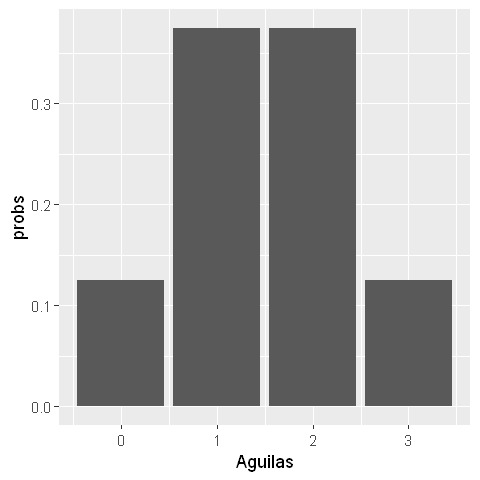

In [45]:
gf <- ggplot(data=S_con_va_marginal,aes(x=Aguilas,y = probs))
gf + geom_col()

**b) La suma de los números de las caras cuando se lanzan dos dados..**

In [46]:
S_dados <- rolldie(2,makespace = TRUE) #lanzamiento de tres monedas

In [47]:
#head(S)

In [48]:
S_dados

X1,X2,probs
1,1,0.02777778
2,1,0.02777778
3,1,0.02777778
4,1,0.02777778
5,1,0.02777778
6,1,0.02777778
1,2,0.02777778
2,2,0.02777778
3,2,0.02777778
4,2,0.02777778


In [49]:
#Obteniendo la tabla marginal de la variable aleatoria
S_dados_con_va<-addrv(S_dados,FUN=sum,invars=c("X1","X2"),name="suma2dados")
S_dados_con_va_marginal<-marginal(S_dados_con_va,"suma2dados")
S_dados_con_va_marginal

suma2dados,probs
2,0.02777778
3,0.05555556
4,0.08333333
5,0.11111111
6,0.13888889
7,0.16666667
8,0.13888889
9,0.11111111
10,0.08333333
11,0.05555556


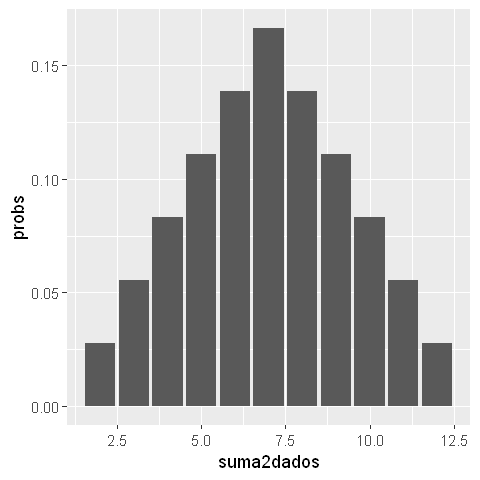

In [50]:
gf_dados <- ggplot(data=S_dados_con_va_marginal,aes(x=suma2dados,y = probs))
gf_dados + geom_col()

6) Se venden 8000 boletos para una rifa de $\$5000.00$ y cada boleto cuesta $\$2.00$.

a) Encontrar la ganancia esperada del comprador de un boleto.
 
b) Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.
 
c) ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.

**a) Encontrar la ganancia esperada del comprador de un boleto.**

In [51]:
#Primero, creamos el grupo de jugadores
jugadores<-data.frame(seq(1,8000,1))

#Cambiando el nombre a la columna
names(jugadores)[1]="Jugadores"

#Añadimos la columna con las probabilidades
juego_rifa<-probspace(jugadores,makespace=TRUE)

#Para ver como quedó la tabla:
head(juego_rifa)

Jugadores,probs
1,0.000125
2,0.000125
3,0.000125
4,0.000125
5,0.000125
6,0.000125


seleccionamos a un solo jugador y determinamos la probabilidad de que gane, según el número de boletos que compra 

In [52]:
#juego_rifa_rv<-addrv(juego_rifa,FUN=sumcum,invars=juego_rifa$probs,name="suma Acumulada")

In [53]:
#juego_rifa_marginal<-marginal(juego_rifa,"suma Acumulada")

In [54]:
#Seleccionamos a un jugador para calcular su probabilidad:
probabilidad_ganar = juego_rifa[1,2]
probabilidad_ganar

[1] 0.000125

In [55]:
probablidad_no_ganar = 1-probabilidad_ganar 
probablidad_no_ganar

[1] 0.999875

In [56]:
si_gana = 5000.0-2.0
si_no_gana = -2.0

#Entonces, el resultado se vería comoo una binomial, donde los dos posibles resultados son:
print("Si gana, obtendría: ")
si_gana
print("Si no gana, obtendría: ")
si_no_gana

[1] "Si gana, obtendría: "


[1] 4998

[1] "Si no gana, obtendría: "


[1] -2

In [57]:
#Por lo tanto, el valor esperado sería:
valor_esperado = (probabilidad_ganar*si_gana)+(probablidad_no_ganar*si_no_gana)
print("El valor esperado sería: ")
valor_esperado

[1] "El valor esperado sería: "


[1] -1.375

**b) Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.**

In [58]:
juego_rifa_rv<-addrv(juego_rifa,probganar=juego_rifa$Jugadores*juego_rifa$probs,invars=c("Jugadores","probs"))
#Revisando el resultado
#print(juego_rifa_rv)
#Cambiando el nombre a la columna
names(juego_rifa_rv)[1]="NumBoletos"

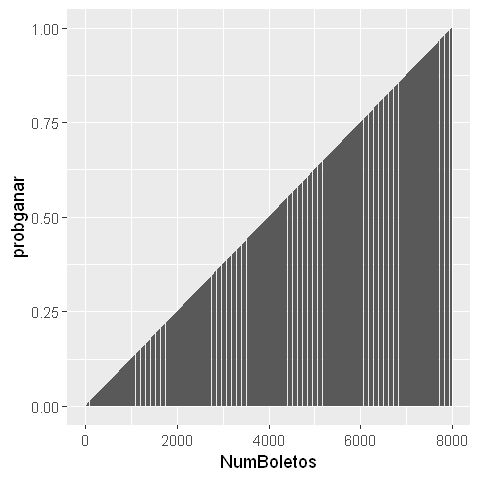

In [59]:
gf_probganar <- ggplot(data=juego_rifa_rv,aes(x=NumBoletos,y = probganar))
gf_probganar + geom_col()

In [60]:
install.packages('dplyr')
library(dplyr)

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpgpynSy\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following object is masked from 'package:ggplot2':

    vars

The following objects are masked from 'package:prob':

    intersect, setdiff, union

The following objects are masked from 'package:timeSeries':

    filter, lag

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Una buena liga sobre el uso de mutate (entre muchas otras funciones) es: https://rsanchezs.gitbooks.io/rprogramming/content/chapter9/mutate.html

In [61]:
#juego<-data.frame(juego_rifa_rv)

In [62]:

#Haciendo gráfica de la ganancia esperada
ganancia_Esperada<-mutate(juego_rifa_rv,ganancia=(5000-(juego_rifa_rv$NumBoletos*(2))))
#-(juego_rifa_rv$NumBoletos*(2))
#head(ganancia_Esperada)
#ganancia_Esperada<-addrv(juego_rifa_rv,ganancia=((juego_rifa_rv$probganar*(5000.0*(-2*juego_rifa_rv$NumBoletos)))+((1-juego_rifa_rv$probganar)*(-2*NumBoletos))))
#print(ganancia_Esperada)

In [63]:
ganancia_Esperada<-mutate(ganancia_Esperada,perdida=(ganancia_Esperada$NumBoletos*(-2)))
#head(ganancia_Esperada)

In [64]:
#ganancia_Esperada<-mutate(ganancia_Esperada,perdida=(ganancia_Esperada$NumBoletos*(-2)))
#head(ganancia_Esperada)

In [65]:
ganancia_Esperada<-mutate(ganancia_Esperada,valor_esperado=((ganancia_Esperada$probganar*ganancia_Esperada$ganancia)+((1-ganancia_Esperada$probganar)*ganancia_Esperada$perdida)))
#head(ganancia_Esperada)

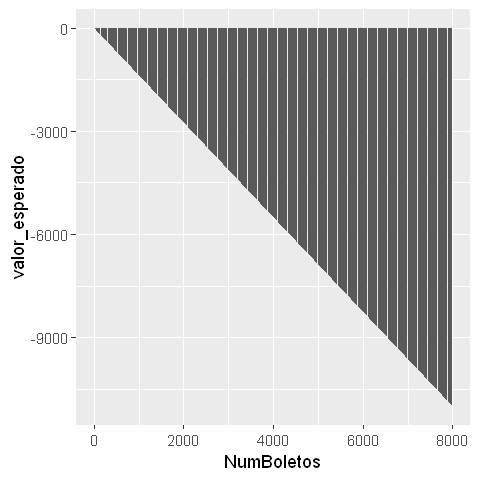

In [66]:
gf_ganancia <- ggplot(data=ganancia_Esperada,aes(x=NumBoletos,y = valor_esperado))
gf_ganancia + geom_col()

In [67]:
#print(ganancia_Esperada)

**c) ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.**

In [68]:
print("Por lo tanto, para quedar a mano debería quedar en cero el valor de comprar todos los boletos, de modo que el premio mínimo para salir a mano al comprar todos los boletos es:")
premioOptimo<-2*8000
premioOptimo

[1] "Por lo tanto, para quedar a mano debería quedar en cero el valor de comprar todos los boletos, de modo que el premio mínimo para salir a mano al comprar todos los boletos es:"


[1] 16000

esto es debido a que nos quedaría lo siguiente:<br>
Valor esperado = [premio-(8000 x 2)]+[(1-1)x( 8000 x 2)] = 0 <br>
Valor esperado = [premio-(16000)]+[(0)x( 8000 x 2)] = 0<br>
Valor esperado = [premio-(16000)]+0 = 0<br>
Valor esperado = premio = +16000<br>

In [69]:
#Para demostrarlo...
ganancia_EsperadaOptima<-mutate(juego_rifa_rv,ganancia=((premioOptimo)-(juego_rifa_rv$NumBoletos*(2))))
ganancia_EsperadaOptima<-mutate(ganancia_EsperadaOptima,perdida=(ganancia_EsperadaOptima$NumBoletos*(-2)))
ganancia_EsperadaOptima<-mutate(ganancia_EsperadaOptima,valor_esperado=((ganancia_EsperadaOptima$probganar*ganancia_EsperadaOptima$ganancia)+((1-ganancia_EsperadaOptima$probganar)*ganancia_EsperadaOptima$perdida)))


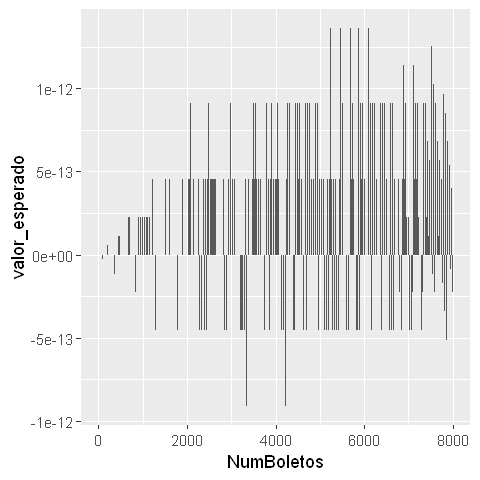

In [70]:
gf_gananciaOptima <- ggplot(data=ganancia_EsperadaOptima,aes(x=NumBoletos,y = valor_esperado))
gf_gananciaOptima + geom_col()

In [71]:
print(ganancia_EsperadaOptima[5,length(ganancia_EsperadaOptima)])

[1] 0


In [72]:
#print(ganancia_EsperadaOptima)

---

## Parte 2: 2_core_R
### Leer, ejecutar y proponer sus propios ejemplos de uso de lenguaje para los ejemplos (en computadora):

# Ejemplos y enunciados de diferentes libros

En esta sección se revisan funciones básicas en R. Las definiciones que toca son:
+ Vectores
    + Función combine
    + Set.seed
    + Funciones que crean vectores
    + Operaciones **con** vectores
    + Operaciones **entre** vectores
    + creación de arreglo
    + Tamaño de la arreglo
    + función sequence
    + cambio en el valor de valores dentro de un arreglo (un valor particular o un rango)
    + media de un arreglo
    + creación de un data frame
    + comparaciones entre arreglos
    + Función table
    + Hacer porcentajes con la función table
    + función barplot
    + Función plot
    + Función getwd()
    + Función Source
+ Funciones del user (más de un renglón)
    + Funciones con un renglón
    + Operaciones vectorizadas en R
    + Función con extra arguments
    + Función Integrate
    + Función curve
+ Vectores y Matrices
    + Creación de una matriz
    + Creación de un vector
    + Ingresar vector a una matriz como renglón
    + Función rowSums()
    + Función apply()
    + Operador de multiplicación de matrices %*%
    + Extraer elementos de una matriz
    + Extraer un renglón
    + matrix of constants
    + Matrix operations for numeric matrices in R:
+ Data Frames
    + Data sets package
    + Función head
    + Sample size and dimension
    + Función names()
    + Structure of the data (str)
    + Función as.matrix()
    + Missing Values (función is.na)
    + Función Summary, (Compute summary statistics)
    + Extraer datos de un data frame
    + Extraer una variable
    + Histogramas
    + Attaching th data frame
    + Función detach
    + función rm
    + Función With
    + Scatterplots and correlations
    + Función pairs
    + Función cor para correlaciones
    




## J. Albert & M. Rizzo, "R by Example", 2012.

El libro tiene github: https://github.com/mariarizzo/RbyExample

In [73]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

**En algunas líneas del código siguiente no es necesario colocar print (sólo se realiza por la integración entre Jupyterlab y R)**

## Vectores

c función `combine` y crea un vector de sus argumentos que se almacena en `x`, un vector:

In [74]:
x <- c(-2, 109, 1, 0) 

In [75]:
print(x)

[1]  -2 109   1   0


---
**
---
**
---
**
---
#### Mi Ejemplo:
La función `combine` se puede usar tanto para strings como para números:

In [76]:
stringcomb<-c("hola","adios")
print(stringcomb)

[1] "hola"  "adios"


In [77]:
Intcomb<-c(1,2)
print(Intcomb)

[1] 1 2


In [78]:
DoubleComb<-c(1.0,2.0)
print(DoubleComb)

[1] 1 2


Pero no aceptan diferentes tipos de datos, en caso de suceder esto los convierte todos a string:

In [79]:
strIntcomb<-c("hola",2,"veces",3.0)
print(strIntcomb)

[1] "hola"  "2"     "veces" "3"    


#### Fin de mi ejemplo
**
---
---
**
---
**
---


Tenemos funciones que crean vectores por ejemplo:

In [80]:
set.seed(2000)
y <- rpois(200, lambda = .61)

In [81]:
print(y)

  [1] 0 1 0 0 1 0 2 1 1 1 0 0 0 0 3 0 1 0 2 0 2 2 1 1 2 1 0 1 1 0 1 0 0 2 1 1 0
 [38] 2 0 0 1 0 0 0 1 0 1 0 1 2 0 1 0 1 0 0 0 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1
 [75] 1 0 0 0 0 1 0 1 0 4 1 0 1 1 2 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 2 0 0 1
[112] 0 1 3 1 1 0 0 1 2 1 0 0 6 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 2 0 0 0 1 0 0
[149] 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 2 1 0 1 0 0 1 0 0 2 1 0 2
[186] 0 0 0 1 2 1 0 1 0 0 0 0 1 0 0


Podemos hacer operaciones con los vectores, por ejemplo:

In [82]:
print(x-4)

[1]  -6 105  -3  -4


In [83]:
print(4/3*(x-4))

[1]  -8.000000 140.000000  -4.000000  -5.333333


Y realizar operaciones entre vectores como:

In [84]:
x2 <- c(48.2, 11.05, -1, 0)

In [85]:
print(x-x2)

[1] -50.20  97.95   2.00   0.00


**
---
---
**
---

**
---
#### Mi Ejemplo:

Como ejemplo en esta sección seguiré usando los vectores que ya había hecho antes:<br>
Podemos realizar operaciones sobre todos los valores de los vectores:

In [86]:
#suma
sumaIntcomb<-Intcomb+1
sumaIntcomb

[1] 2 3

In [87]:
#resta
restaIntcomb<-Intcomb-31
restaIntcomb

[1] -30 -29

In [88]:
#multiplicacion
multIntcomb<-Intcomb*10
multIntcomb

[1] 10 20

In [89]:
#division
divIntcomb<-Intcomb/2
divIntcomb

[1] 0.5 1.0

También se pueden realizar operaciones entre vectores:

In [90]:
multres<-multIntcomb-restaIntcomb
multres

[1] 40 49

#### Fin de mi ejemplo
**
---
**
---
---
**
---


#### Ejemplo: President's heights

An article in [Wikipedia](https://en.wikipedia.org/wiki/Heights_of_presidents_and_presidential_candidates_of_the_United_States) reports data on the heights of Presidents of the United States and the heights of their opponents in the presidential election. It has been observed ([reference](https://www.washingtonpost.com/?noredirect=on), [reference](https://usatoday30.usatoday.com/news/politicselections/nation/president/2004-06-23-bush-kerry-cover_x.htm)) that the taller presidential candidate typically wins the election. In this example, we explore the data corresponding to the elections in the television era. Next values are the heights of the presidents and their opponents in the U.S. presidential elections of 1948 through 2008, extracted from the Wikipedia article.

In [91]:
winner <- c(185, 182, 182, 188, 188, 188, 185, 185, 177,
182, 182, 193, 183, 179, 179, 175)
opponent <- c(175, 193, 185, 187, 188, 173, 180, 177, 183,
185, 180, 180, 182, 178, 178, 173)


In [92]:
length(winner)

[1] 16

In [93]:
year <- seq(from=2008, to=1948, by=-4)

According to the [Washington Post blog](https://www.washingtonpost.com/?noredirect=on), Wikipedia misstates “Bill Clinton’s height, which was measured during official medical exams at 6 foot 2-1/2, making him just a tad taller than George H.W. Bush.” We can correct the height measurement for Bill Clinton by assigning a height of 189 cm to the fourth and fifth entries of the vector winner

In [94]:
winner[4:5] <- 189

In [95]:
print(winner)

 [1] 185 182 182 189 189 188 185 185 177 182 182 193 183 179 179 175


Are presidents taller than average adult males? According to the National Center for Health Statistics, in 2005 the average height for an adult male in the United States is 5 feet 9.2 inches or 175.768 cm. The sample mean is computed by the mean function.

In [96]:
mean(winner)

[1] 183.4375

In [97]:
mean(opponent)

[1] 181.0625

In [98]:
difference <- winner - opponent

In [99]:
print(difference)

 [1]  10 -11  -3   2   1  15   5   8  -6  -3   2  13   1   1   1   2


**
---
---
**
---

**
---
#### Mi Ejemplo:

Podemos obtener información sobre los vectores:

In [100]:
elvectorazo<-c(1,61,56856,615,56,5,2,158,3,1,3,158,3,8,156,16,168,6168,35,8,681,156,156)

#tamaño
length(elvectorazo)

[1] 23

También cambiar un valor específico o varios al mismo tiempo

In [101]:
elvectorazo2<-elvectorazo

print("el vector original es: ")
print(elvectorazo)

elvectorazo2[3:10]=10

print("el vector después de cambiar varios valores por 10 es: ")
print(elvectorazo2)

[1] "el vector original es: "
 [1]     1    61 56856   615    56     5     2   158     3     1     3   158
[13]     3     8   156    16   168  6168    35     8   681   156   156
[1] "el vector después de cambiar varios valores por 10 es: "
 [1]    1   61   10   10   10   10   10   10   10   10    3  158    3    8  156
[16]   16  168 6168   35    8  681  156  156


**cambiando solo un valor (el mas grande:)**

In [102]:
elvectorazo3<-elvectorazo
elvectorazo3[3]=10
print(elvectorazo3)

 [1]    1   61   10  615   56    5    2  158    3    1    3  158    3    8  156
[16]   16  168 6168   35    8  681  156  156


obteniendo los promedios:

In [103]:
print("La media del vector original es:" )
print(mean(elvectorazo))
print("La media del vector 2 es: ")
print(mean(elvectorazo2))
print("La media del vector3 es: ")
print(mean(elvectorazo3))

[1] "La media del vector original es:"
[1] 2846.696
[1] "La media del vector 2 es: "
[1] 341.6522
[1] "La media del vector3 es: "
[1] 375.1304


#### Fin de mi ejemplo
**
---
**
---
---
**
---


An easy way to display our data is as a data frame:

In [104]:
data.frame(year, winner, opponent, difference)

year,winner,opponent,difference
2008,185,175,10
2004,182,193,-11
2000,182,185,-3
1996,189,187,2
1992,189,188,1
1988,188,173,15
1984,185,180,5
1980,185,177,8
1976,177,183,-6
1972,182,185,-3


... We see that most, but not all, of the differences in height are positive, indicating that the taller candidate won the election. 

**
---
---
**
---

**
---
#### Mi Ejemplo:

podemos hacer un data frame con todos los vectores que ya tenemos:

In [105]:
data.frame(elvectorazo,elvectorazo2,elvectorazo3)

elvectorazo,elvectorazo2,elvectorazo3
1,1,1
61,61,61
56856,10,10
615,10,615
56,10,56
5,10,5
2,10,2
158,10,158
3,10,3
1,10,1


#### Fin de mi ejemplo
**
---
**
---
---
**
---


In [106]:
taller.won <- winner > opponent

In [107]:
print(taller.won)

 [1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE


The table function summarizes discrete data such as the result in the vector taller.won

In [108]:
table(taller.won)

taller.won
FALSE  TRUE 
    4    12 

We can use the result of table to display percentages if we divide the result by 16 and multiply that result by 100.

In [109]:
table(taller.won) / 16 * 100

taller.won
FALSE  TRUE 
   25    75 

**
---
---
**
---

**
---
#### Mi Ejemplo:

podemos comparar vectores y obtendríamos un vector de True y False

In [110]:
elvectorazo4<-elvectorazo2*(elvectorazo3/3.5)
comparacion<-elvectorazo>elvectorazo4
comparacion

[1]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Cuando se tienen este tipo de situaciones, se puede usar un table para resumir la información
(también funciona con todo tipo de datos)

In [111]:
table(comparacion)

comparacion
FALSE  TRUE 
   19     4 

In [112]:
table(elvectorazo)

elvectorazo
    1     2     3     5     8    16    35    56    61   156   158   168   615 
    2     1     3     1     2     1     1     1     1     3     2     1     1 
  681  6168 56856 
    1     1     1 

In [113]:
table(elvectorazo2)

elvectorazo2
   1    3    8   10   16   35   61  156  158  168  681 6168 
   1    2    2    8    1    1    1    3    1    1    1    1 

In [114]:
table(elvectorazo3)

elvectorazo3
   1    2    3    5    8   10   16   35   56   61  156  158  168  615  681 6168 
   2    1    3    1    2    1    1    1    1    1    3    2    1    1    1    1 

Table te cuenta el numero de veces que se repite cada uno de los elementos tienes en el vector

#### Fin de mi ejemplo
**
---
**
---
---
**
---


Thus, in the last 16 elections, the odds in favor of the taller candidate winning the election are 3 to 1.

Several types of graphs of this data may be interesting to help visualize any pattern. For example, we could display a barplot of differences using the barplot function. For the plot we use the `rev` function to reverse the order of the differences so that the election year is increasing from left to right. We also provide a descriptive label for both axes.

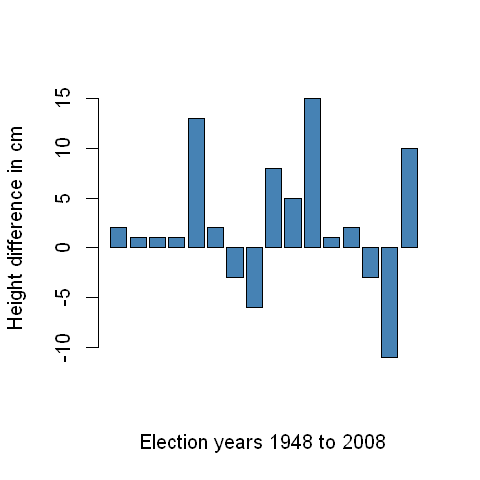

In [115]:
barplot(rev(difference), 
        xlab="Election years 1948 to 2008",
        ylab="Height difference in cm", 
        col='steelblue') #see colors() for built-in colors in R

Barplot of the difference in height of the election winner in the Electoral College over the height of the main opponent in the U.S. Presidential elections. Height differences in centimeters for election years 1948 through 2008 are shown from left to right. The electoral vote determines the outcome of the election. In 12 out of these 16 elections, the taller candidate won the electoral vote. In 2000, the taller candidate (Al Gore) did not win the electoral vote, but received more popular votes.

It would also be interesting to display a scatterplot of the data. A scatter- plot of loser’s heights vs winner’s height...

**
---
---
**
---

**
---
#### Mi Ejemplo:

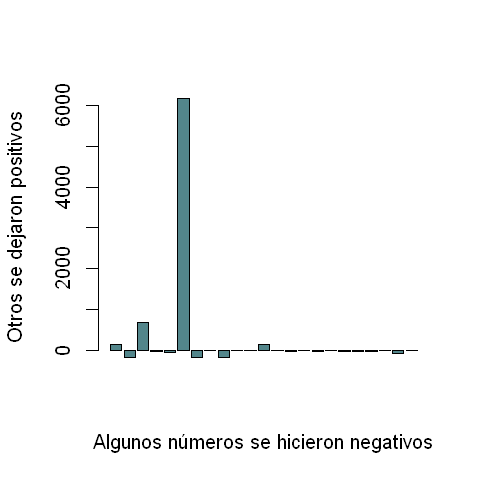

In [116]:
elvectorazoNeg<-c(1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,1,-1,1,-1,-1,1,-1,1)
elvectorazoNeg<-elvectorazoNeg*elvectorazo2
barplot(rev(elvectorazoNeg),xlab="Algunos números se hicieron negativos",ylab="Otros se dejaron positivos", col='cadetblue4')

In [117]:
#colors()

#### Fin de mi ejemplo
**
---
**
---
---
**
---


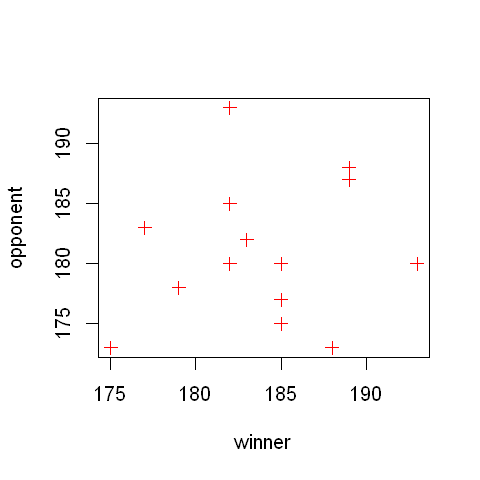

In [118]:
plot(winner, opponent, pch=3, col='red') #pch define el símbolo del punto, ver ?points

##### Comentarios

###### En un script de R ...

El ejemplo anterior lo podemos escribir en un sólo *script* el cual contiene las líneas de código de arriba:

###### Archivo con extensión .R:

```
winner <- c(185, 182, 182, 188, 188, 188, 185, 185, 177,
182, 182, 193, 183, 179, 179, 175)

opponent <- c(175, 193, 185, 187, 188, 173, 180, 177, 183,
185, 180, 180, 182, 178, 178, 173)

year <- seq(from=2008, to=1948, by=-4)

winner[4:5] <- 189

difference <- winner - opponent

data.frame(year, winner, opponent, difference)

taller.won <- winner > opponent

if (sum(taller.won) > sum(!taller.won)) print('its true that the taller presidential candidate typically wins the election')
```

Y lo ejecutamos guardándolo con nombre `miscript.R` en el directorio de trabajo, el cual se obtiene con: `getwd()`

Hacemos:

In [119]:
#source('miscript.R')

**
---
---
**
---

**
---
#### Mi Ejemplo:

Se puede obtener una gráfica sencilla de los datos de la siguiente manera:

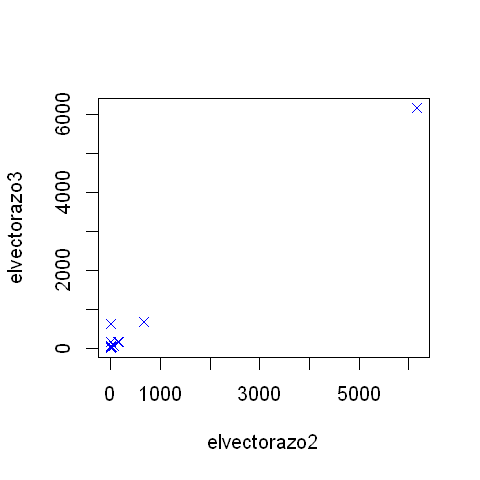

In [120]:
plot(elvectorazo2, elvectorazo3, pch=4, col='blue') #con pch cambiamos el tipo de punto

#### Fin de mi ejemplo
**
---
**
---
---
**
---


## Funciones

Sintaxis de una función:

```
f <- function(x, ...){

}
```

Aquí `f` es el nombre de la función, `x` es el nombre del primer argumento, `...` indica argumentos posibles (las funciones pueden definirse sin argumentos). Los `{}` encierran el cuerpo de la función. El valor que regresa la función es el valor de la última expresión evaluada y se puede colocar la palabra reservada `return` o no.

#### Ejemplo:


In [121]:
mivar <- function(x){
    v <- var(x)
    n <- NROW(x) #número de observaciones en x
    v*(n-1)/n
}

La cual calcula: $$ \hat{\sigma}^2 = \frac{1}{n}\displaystyle \sum_{i=1}^n(x_i - \bar{x})^2 = \frac{n-1}{n}s^2$$

In [122]:
vec <- c(51.9, 51.8, 51.9, 53)

In [123]:
mivar(vec)

[1] 0.2425

**Obs:** también colocar antes del último `}` el statement `return v*(n-1)/n` es correcto pero no es necesario.

#### Argumentos de funciones

Supóngase que se desea aproximar la integral $$B(a,b) = \displaystyle \int_0^1x^{a-1}(1-x)^{b-1}dx,$$ para constantes $a >0, b > 0$. 

##### Solución

Se utiliza la función `integrate` y la definición del integrando dada por:

In [124]:
f <- function(x, a=1, b=1)
    x^(a-1)*(1-x)^(b-1)

**Obs:** no son necesarios `{}` pues sólo tiene una línea la `function`. También obsérvse que se definieron valores por default para los parámetros `a` y `b`.

In [125]:
x <- seq(0,1,.2) #secuencia de 0 a 1 con espaciado de .2

In [126]:
print(f(x,a=2,b=2))

[1] 0.00 0.16 0.24 0.24 0.16 0.00


**Obs:** se definió `x` vector y se le pasó a la `f`. Entonces la `f` realiza las operaciones de una forma vectorizada y devuelve un vector del mismo tamaño que `x`.

In [127]:
integrate(f, lower = 0, upper = 1, a=2, b=2)

0.1666667 with absolute error < 1.9e-15

**Obs:** la función `integrate` es un ejemplo de una función con *extra arguments*:

In [128]:
args(integrate)

function (f, lower, upper, ..., subdivisions = 100L, rel.tol = .Machine$double.eps^0.25, 
    abs.tol = rel.tol, stop.on.error = TRUE, keep.xy = FALSE, 
    aux = NULL) 
NULL

los tres puntos que se observan son los *extra arguments* y en el ejemplo son $a$ y $b$.

Se puede graficar la gráfica de una función con la función `curve`. En el caso anterior si deseamos graficar el integrando: $x^{a-1}*(1-x)^{b-1}$ para $x$ de $0$ a $1$ y $a=b=.5$ se ejecuta:

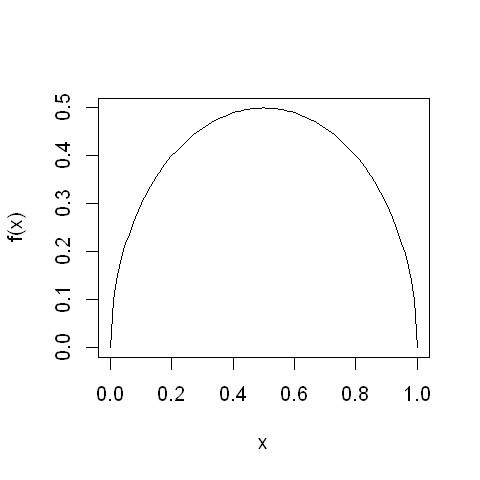

In [129]:
curve(x^.5*(1-x)^.5, from = 0, to=1, ylab='f(x)')

**
---
---
**
---

**
---
#### Mi Ejemplo:

Sintaxis de una función:

```
f <- function(x, ...){

}
```

Aquí `f` es el nombre de la función, `x` es el nombre del primer argumento, `...` indica argumentos posibles (las funciones pueden definirse sin argumentos). Los `{}` encierran el cuerpo de la función. El valor que regresa la función es el valor de la última expresión evaluada y se puede colocar la palabra reservada `return` o no.

In [130]:
multiplicaElementos <- function(vector,multiplicador){
    resultado <- vector*multiplicador
    resultado
}

In [131]:
multiplicaElementos(elvectorazo,10)

[1]     10    610 568560   6150    560     50     20   1580     30     10
[11]     30   1580     30     80   1560    160   1680  61680    350     80
[21]   6810   1560   1560

Tambien se pueden crear funciones con defaults

In [132]:
multiplicaElementosDefault <- function(vector,multiplicador=5){
    resultado <- vector*multiplicador
    resultado
}

In [133]:
multiplicaElementosDefault(elvectorazo)

[1]      5    305 284280   3075    280     25     10    790     15      5
[11]     15    790     15     40    780     80    840  30840    175     40
[21]   3405    780    780

In [134]:
#Notese que está vectorizando la operación al introducir un vector, pero si le meto un número, lo hace por el número

In [135]:
multiplicaElementosDefault(2)

[1] 10

Se puede acceder a los valores default de una función con args("funcion")

In [136]:
args(multiplicaElementosDefault)

function (vector, multiplicador = 5) 
NULL

Se puede graficar la gráfica de una función con la función `curve`. En el caso anterior si deseamos graficar el integrando: $x^{a-1}*(1-x)^{b-1}$ para $x$ de $0$ a $1$ y $a=b=.5$ se ejecuta:

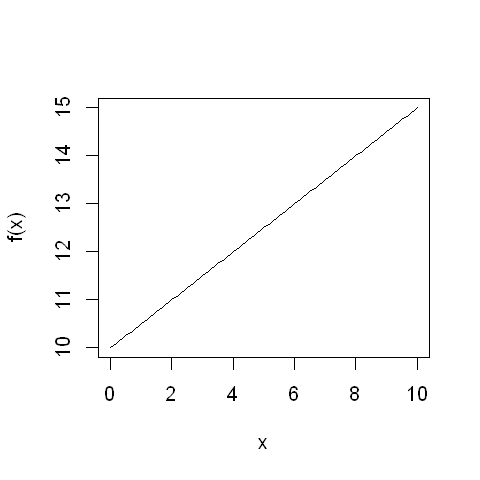

In [137]:
curve((1/2)*x+10, from = 0, to=10, ylab='f(x)')

se usó y=mx+b lo cual da una recta

#### Fin de mi ejemplo
**
---
**
---
---
**
---


## Vectores y Matrices

### Ejemplo: class mobility

The following model of class mobility is discussed in Ross [Introduction to Probability Models, Example 4.19, p. 207]. Assume that the class of a child (lower, middle, or upper class) depends only on the class of his/her parents. The class of the parents is indicated by the row label. The entries in the table below correspond to the chance that the child will transition to the class indicated by the column label.

|-----| lower | middle | upper |
|-----|:-----:|:------:|:-----:|
|lower| 0.45  | 0.48   | 0.07  | 
|middle| 0.05 | 0.70   | 0.25  |
|upper|0.01   |0.5|0.49|

To create a matrix with these transition probabilities, we use the matrix function. First, the vector of probabilities probs is constructed to supply the entries of the matrix. Then the matrix is defined by its entries, number of rows, and number of columns.

In [138]:
probs <- c(.45, .05, .01, .48, .70, .50, .07, .25, .49)

In [139]:
P <- matrix(probs, nrow=3, ncol=3)

In [140]:
P

0.45,0.48,0.07
0.05,0.70,0.25
0.01,0.50,0.49


Notice that the values are entered by column; to enter the data by row, use the optional argument byrow=TRUE in the matrix function. Matrices can optionally have row names and column names. In this case, row names and column names are identical, so we can assign both using

In [141]:
rownames(P) <- colnames(P) <- c("lower", "middle", "upper")

and the updated value of P is

In [142]:
P

,lower,middle,upper
lower,0.45,0.48,0.07
middle,0.05,0.70,0.25
upper,0.01,0.50,0.49


In the matrix $P = (p_{ij})$, the probability $p_{ij}$ in the $i$-th row and $j$-th column is the probability of a transition from class $i$ to class $j$ in one generation.

This type of matrix has rows that sum to 1 (because each row is a probability distribution on the three classes). This fact can be verified by the rowSums function.

In [143]:
rowSums(P)

lower middle  upper 
     1      1      1

Another approach uses the apply function. It requires specifying the name of the matrix, MARGIN (row=1, column=2), and FUN (function) as its arguments.

In [144]:
apply(P, MARGIN=1, FUN=sum)

lower middle  upper 
     1      1      1

It can be shown that the transition probabilities for two generations are given by the product $P2 =PP$, which can be computed by the matrix multiplication operator %*%.

In [145]:
P2 <- P %*% P
P2

,lower,middle,upper
lower,0.2272,0.5870,0.1858
middle,0.0600,0.6390,0.3010
upper,0.0344,0.5998,0.3658


**Obs:** $P^2$ squares every element of the matrix and the result is the matrix $(p^2_{ij})$, not the matrix product.

In [146]:
P^2

,lower,middle,upper
lower,0.2025,0.2304,0.0049
middle,0.0025,0.4900,0.0625
upper,0.0001,0.2500,0.2401


To extract elements from the matrix, the [row, column] syntax is used. If the row or column is omitted, this specifies all rows (columns). In two generations, the probability that descendants of lower class parents can transition to upper class is in row 1, column 3:

In [147]:
P2[1,3]

[1] 0.1858

and the probability distribution for lower class to (lower, middle, upper) is given by row 1:

In [148]:
P2[1,]

lower middle  upper 
0.2272 0.5870 0.1858

**
---
---
**
---

**
---
#### Mi Ejemplo:

Se puede crear una matriz de la siguiente forma:

In [149]:
elvectorazoPar<-c(1,61,56856,615,56,5,2,158,3,1,3,158,3,8,156,16,168,6168,35,8,681,156,156,20)

In [150]:
matriz <- matrix(elvectorazoPar, nrow=6, ncol=4)

In [151]:
matriz

1,2,3,35
61,158,8,8
56856,3,156,681
615,1,16,156
56,3,168,156
5,158,6168,20


Los números entran como columnas, pero se pueden meter como renglones

Para asignar nombres a cada columna y renglon:

In [152]:
colnames(matriz) <- c("c1", "c2", "c3","c4")
rownames(matriz) <- c("r1", "r2", "r3","r4","r5","r6")

In [153]:
matriz

,c1,c2,c3,c4
r1,1,2,3,35
r2,61,158,8,8
r3,56856,3,156,681
r4,615,1,16,156
r5,56,3,168,156
r6,5,158,6168,20


Se pueden sumar los valores de los renglones y las columnas

In [154]:
rowSums(matriz)

r1    r2    r3    r4    r5    r6 
   41   235 57696   788   383  6351

In [155]:
colSums(matriz)

c1    c2    c3    c4 
57594   325  6519  1056

In [156]:
#Otra forma de hacer la misma suma:
apply(matriz, MARGIN=1, FUN=sum)

r1    r2    r3    r4    r5    r6 
   41   235 57696   788   383  6351

In [157]:
elvectorazoPar2<-elvectorazoPar/1000000

matriz2 <- matrix(elvectorazoPar2, nrow=4, ncol=6)
rownames(matriz2) <- c("r1", "r2", "r3","r4")

se pueden multiplicar matrices con %*% 

In [158]:
matrmult <- matriz2 %*% matriz
matrmult

,c1,c2,c3,c4
r1,0.188643,0.116964,4.229599,0.042822
r2,0.408330,0.044075,1.998939,0.969432
r3,0.326226,0.138946,1.141636,2.024935
r4,9.003889,0.029868,0.152717,0.134531


se puede hacer un cuadrado de matriz

In [159]:
elvectorazoaxa<-c(1,61,56856,615,56,5,2,158,3,1,3,158,3,8,156,16,168,6168,35,8,681,156,156,20,5)
matriz3 <- matrix(elvectorazoaxa, nrow=5, ncol=5)
rownames(matriz3) <-colnames(matriz3) <- c("r1", "r2", "r3","r4","r5")


In [160]:
matriz3^2

,r1,r2,r3,r4,r5
r1,1,25,9,256,463761
r2,3721,4,24964,28224,24336
r3,3232604736,24964,9,38044224,24336
r4,378225,9,64,1225,400
r5,3136,1,24336,64,25


Tambien podemos obtener un valor en especifico o un renglon o una columna

In [161]:
matriz3[3,4]

[1] 6168

In [162]:
matriz3[4,]

r1  r2  r3  r4  r5 
615   3   8  35  20

#### Fin de mi ejemplo
**
---
**
---
---
**
---


After several generations, each row of the transition matrix will be approximately equal, with probabilities $p = (l,m,u)$ corresponding to the percentages of lower, middle, and upper class occupations. After eight transitions, the probabilities are $P8$:

In [163]:
P4 <- P2 %*% P2
P8 <- P4 %*% P4
P8

,lower,middle,upper
lower,0.06350395,0.6233444,0.3131516
middle,0.06239010,0.6234412,0.3141687
upper,0.06216410,0.6234574,0.3143785


It can be shown that the limiting probabilities are 0.07, 0.62, and 0.31. For the solution p, see Ross [Introduction to Probability Models, p. 207].

**Obs:** To enter a matrix of constants, as in this example, it is usually easier to enter data by rows using byrow=TRUE in the matrix function. The “by row” format makes it easier to see (visually) the data vector as a matrix in the code.

In [164]:
Q <- matrix(c(  0.45, 0.48, 0.07,
               0.05, 0.70, 0.25, 
               0.01, 0.50, 0.49), nrow=3, ncol=3, byrow=TRUE)

In [165]:
Q

0.45,0.48,0.07
0.05,0.70,0.25
0.01,0.50,0.49


Matrix operations for numeric matrices in R:

* Elementwise multiplication: $*$
  
  If matrices $A = (a_{ij})$ and $B = (b_{ij})$ have the same dimension, then $A*B$ is evaluated as the matrix with entries $(a_{ij}b_{ij})$.
  
* If $A = (a_{ij})$ is a matrix then $A^r$ is evaluated as the matrix with entries $(a_{rij})$.

* Matrix multiplication: $\%*\%$

  If $A = (a_{ij})$ is an $n x k$ matrix and $B = (b_{ij})$ is a $k x m$ matrix, then $A \%*\% B$ is evaluated as the $n x m$ matrix product $AB$.

* Matrix inverse:

  If A is a nonsingular matrix, the inverse of A is returned by *solve(A)*.
  
  For eigenvalues and matrix factorization, see *eigen, qr, chol, and svd*.

## Data Frames

Un *data frame* tiene renglones y columnas. Las variables corresponden a las columnas y las observaciones a los renglones. Las variables pueden ser numéricas (números) o categóricas (caracteres o factores).

### Ejemplo: USArrests

In [166]:
?datasets

datasets-package {datasets},R Documentation


In [167]:
?USArrests

USArrests               package:datasets               R Documentation

_V_i_o_l_e_n_t _C_r_i_m_e _R_a_t_e_s _b_y _U_S _S_t_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     This data set contains statistics, in arrests per 100,000
     residents for assault, murder, and rape in each of the 50 US
     states in 1973.  Also given is the percent of the population
     living in urban areas.

_U_s_a_g_e:

     USArrests
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 4 variables.

       [,1]  Murder    numeric  Murder arrests (per 100,000)  
       [,2]  Assault   numeric  Assault arrests (per 100,000) 
       [,3]  UrbanPop  numeric  Percent urban population      
       [,4]  Rape      numeric  Rape arrests (per 100,000)    
      
_N_o_t_e:

     'USArrests' contains the data as in McNeil's monograph.  For the
     'UrbanPop' percentages, a review of the table (No. 21) in the
     Statistical Abstracts 1975 reveals a transcription error for
     Maryland (and that McNeil used the same "round to even" rule that
     R's 'round()' uses), as found by Daniel S Coven (Arizona).

     See the example below on how to correct the error and improve
     accuracy for the '<n>.5' percentages.

_S_o_u_r_c_e:

     World Almanac and Book of facts 1975.  (Crime rates).

     Statistical Abstracts of the United States 1975, p.20, (Urban
     rates), possibly available as <URL:
     https://books.google.ch/books?id=zl9qAAAAMAAJ&pg=PA20>.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

_S_e_e _A_l_s_o:

     The 'state' data sets.

_E_x_a_m_p_l_e_s:

     summary(USArrests)
     
     require(graphics)
     pairs(USArrests, panel = panel.smooth, main = "USArrests data")
     
     ## Difference between 'USArrests' and its correction
     USArrests["Maryland", "UrbanPop"] # 67 -- the transcription error
     UA.C <- USArrests
     UA.C["Maryland", "UrbanPop"] <- 76.6
     
     ## also +/- 0.5 to restore the original  <n>.5  percentages
     s5u <- c("Colorado", "Florida", "Mississippi", "Wyoming")
     s5d <- c("Nebraska", "Pennsylvania")
     UA.C[s5u, "UrbanPop"] <- UA.C[s5u, "UrbanPop"] + 0.5
     UA.C[s5d, "UrbanPop"] <- UA.C[s5d, "UrbanPop"] - 0.5
     
     ## ==> UA.C  is now a *C*orrected version of  USArrests

The USArrests data records rates of violent crimes in the US. The statistics are given as arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. The percentage of the population living in urban areas is also given. Some basic functions to get started with a data frame are illustrated with this data set.

To display the first few lines of data:

In [168]:
print(head(USArrests))

           Murder Assault UrbanPop Rape
Alabama      13.2     236       58 21.2
Alaska       10.0     263       48 44.5
Arizona       8.1     294       80 31.0
Arkansas      8.8     190       50 19.5
California    9.0     276       91 40.6
Colorado      7.9     204       78 38.7


The result shows that we have four variables named Murder, Assault, UrbanPop, and Rape, and that the observations (rows) are labeled by the name of the state. We also see that the states appear to be listed in alphabetical order. All of the variables appear to be quantitative, which we expected from the description above.

#### Sample size and dimension

How many observations are in this data set? (NROW, nrow, or dim)

In [169]:
NROW(USArrests)

[1] 50

In [170]:
nrow(USArrests)

[1] 50

In [171]:
print(dim(USArrests))

[1] 50  4


The dimension (dim) of a data frame or a matrix returns a vector with the number of rows and number of columns. NROW returns the number of observations. We have 50 observations corresponding to the 50 states in the U.S.

#### Names of variables

Get (or set) names of variables in the data frame:

In [172]:
print(names(USArrests))

[1] "Murder"   "Assault"  "UrbanPop" "Rape"    


### Structure of the data

Display information about the structure of the data frame (str):

In [173]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


The result of str gives the dimension as well as the name and type of each variable. We have two numeric type and two integer type variables. Although we can think of integer as a special case of numeric, they are stored differently in R.

For many data sets, like USArrests, all of the data are numbers and in this case the data can be converted to a matrix using as.matrix. But in order to store the data in a matrix, all variables must be of the same type so R will convert the integers to numeric. Compare the result in matrix form:

In [174]:
arrests <- as.matrix(USArrests)

In [175]:
str(arrests)

 num [1:50, 1:4] 13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
  ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"


This output shows that all of the data was converted to numeric, listed on the first line as num. The attributes (attr) are the row and column names (dimnames). The conversion preserved the row labels and converted the variable names to column labels. We used names to get the names of the variables in the data frame, but we would use rownames, colnames or dimnames (to get both) to get the row and/or column names. These last three functions can also be used on data frames.

### Missing values

The is.na function returns TRUE for a missing value and otherwise FALSE. The expression is.na(USArrests) will return a data frame the same size as USArrests where every entry is TRUE or FALSE. To quickly check if any of the results are TRUE we use the any function.

In [176]:
any(is.na(USArrests))

[1] FALSE

#### Working with a data frame

In this section we illustrate some operations on data frames, and some basic statistics and plots.

##### Compute summary statistics

Obtain appropriate summary statistics for each variable using summary. For numeric data, the summary function computes a five-number summary and sample mean.

In [177]:
summary(USArrests)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

If there were any missing values, the number of missing values would be included in the summaries. If any of our variables were categorical, summary would tabulate the values for those variables.

From the summary it appears that the mean and median are approximately equal for all variables except Assault. The mean for Assault is larger than the median, indicating that the assault data is positively skewed.

##### Extract data from a data frame

The simplest way to extract data from a data frame uses the matrix-style [row, column] indexing.

In [178]:
USArrests["California", "Murder"]

[1] 9

In [179]:
USArrests["California", ]

,Murder,Assault,UrbanPop,Rape
California,9,276,91,40.6


##### Extract a variable using \\$

Variables can be extracted using the $ operator followed by the name of the
variable.

In [180]:
print(USArrests$Assault)

 [1] 236 263 294 190 276 204 110 238 335 211  46 120 249 113  56 115 109 249  83
[20] 300 149 255  72 259 178 109 102 252  57 159 285 254 337  45 120 151 159 106
[39] 174 279  86 188 201 120  48 156 145  81  53 161


**
---
---
**
---

**
---
#### Mi Ejemplo:

Hay una serie de data sets disponibles en R

In [181]:
library(help = "datasets")

Documentation for package 'datasets'


		Information on package 'datasets'

Description:

Package:       datasets
Version:       3.6.0
Priority:      base
Title:         The R Datasets Package
Author:        R Core Team and contributors worldwide
Maintainer:    R Core Team <R-core@r-project.org>
Description:   Base R datasets.
License:       Part of R 3.6.0
Built:         R 3.6.0; ; 2019-05-15 14:26:28 UTC; windows

Index:

AirPassengers           Monthly Airline Passenger Numbers 1949-1960
BJsales                 Sales Data with Leading Indicator
BOD                     Biochemical Oxygen Demand
CO2                     Carbon Dioxide Uptake in Grass Plants
ChickWeight             Weight versus age of chicks on different diets
DNase                   Elisa assay of DNase
EuStockMarkets          Daily Closing Prices of Major European Stock
                        Indices, 1991-1998
Formaldehyde            Determination of Formaldehyde
HairEyeColor            Hair and Eye Color of Statis

In [182]:
?Titanic

Titanic                package:datasets                R Documentation

_S_u_r_v_i_v_a_l _o_f _p_a_s_s_e_n_g_e_r_s _o_n _t_h_e _T_i_t_a_n_i_c

_D_e_s_c_r_i_p_t_i_o_n:

     This data set provides information on the fate of passengers on
     the fatal maiden voyage of the ocean liner 'Titanic', summarized
     according to economic status (class), sex, age and survival.

_U_s_a_g_e:

     Titanic
     
_F_o_r_m_a_t:

     A 4-dimensional array resulting from cross-tabulating 2201
     observations on 4 variables.  The variables and their levels are
     as follows:

       No  Name      Levels              
        1  Class     1st, 2nd, 3rd, Crew 
        2  Sex       Male, Female        
        3  Age       Child, Adult        
        4  Survived  No, Yes             
      
_D_e_t_a_i_l_s:

     The sinking of the Titanic is a famous event, and new books are
     still being published about it.  Many well-known facts-from the
     proportions of first-class passengers to the 'women and children
     first' policy, and the fact that that policy was not entirely
     successful in saving the women and children in the third class-are
     reflected in the survival rates for various classes of passenger.

     These data were originally collected by the British Board of Trade
     in their investigation of the sinking.  Note that there is not
     complete agreement among primary sources as to the exact numbers
     on board, rescued, or lost.

     Due in particular to the very successful film 'Titanic', the last
     years saw a rise in public interest in the Titanic.  Very detailed
     data about the passengers is now available on the Internet, at
     sites such as _Encyclopedia Titanica_ (<URL:
     https://www.encyclopedia-titanica.org/>).

_S_o_u_r_c_e:

     Dawson, Robert J. MacG. (1995), The 'Unusual Episode' Data
     Revisited.  _Journal of Statistics Education_, *3*.  doi:
     10.1080/10691898.1995.11910499 (URL:
     https://doi.org/10.1080/10691898.1995.11910499).

     The source provides a data set recording class, sex, age, and
     survival status for each person on board of the Titanic, and is
     based on data originally collected by the British Board of Trade
     and reprinted in:

     British Board of Trade (1990), _Report on the Loss of the
     'Titanic' (S.S.)_.  British Board of Trade Inquiry Report
     (reprint).  Gloucester, UK: Allan Sutton Publishing.

_E_x_a_m_p_l_e_s:

     require(graphics)
     mosaicplot(Titanic, main = "Survival on the Titanic")
     ## Higher survival rates in children?
     apply(Titanic, c(3, 4), sum)
     ## Higher survival rates in females?
     apply(Titanic, c(2, 4), sum)
     ## Use loglm() in package 'MASS' for further analysis ...

In [183]:
install.packages("titanic")
library(titanic)
print(head(titanic_train))

package 'titanic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpgpynSy\downloaded_packages


Warning message:
"package 'titanic' was built under R version 3.6.1"

  PassengerId Survived Pclass
1           1        0      3
2           2        1      1
3           3        1      3
4           4        1      1
5           5        0      3
6           6        0      3
                                                 Name    Sex Age SibSp Parch
1                             Braund, Mr. Owen Harris   male  22     1     0
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female  38     1     0
3                              Heikkinen, Miss. Laina female  26     0     0
4        Futrelle, Mrs. Jacques Heath (Lily May Peel) female  35     1     0
5                            Allen, Mr. William Henry   male  35     0     0
6                                    Moran, Mr. James   male  NA     0     0
            Ticket    Fare Cabin Embarked
1        A/5 21171  7.2500              S
2         PC 17599 71.2833   C85        C
3 STON/O2. 3101282  7.9250              S
4           113803 53.1000  C123        S
5           373450  8.0500              S

#### Tamaño de la muestra y dimensiones

Cuantas observaciones hay en el data set? (NROW, nrow, or dim)

In [184]:
NROW(titanic_train)

[1] 891

In [185]:
nrow(titanic_train)

[1] 891

In [186]:
print(dim(titanic_train))

[1] 891  12


#### Nombres de las variables

In [187]:
print(names(titanic_train))

 [1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"   


### Estructura de los datos

In [188]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [189]:
fix(titanic_train)

In [190]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### Missing values

In [191]:
any(is.na(titanic_train))

[1] TRUE

#### Working with a data frame

##### Calcular estadísticas summary

In [192]:
summary(titanic_train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

##### Extract a variable using \\$

Variables can be extracted using the $ operator followed by the name of the
variable.

In [193]:
print(titanic_train$Age)

  [1] 22.00 38.00 26.00 35.00 35.00    NA 54.00  2.00 27.00 14.00  4.00 58.00
 [13] 20.00 39.00 14.00 55.00  2.00    NA 31.00    NA 35.00 34.00 15.00 28.00
 [25]  8.00 38.00    NA 19.00    NA    NA 40.00    NA    NA 66.00 28.00 42.00
 [37]    NA 21.00 18.00 14.00 40.00 27.00    NA  3.00 19.00    NA    NA    NA
 [49]    NA 18.00  7.00 21.00 49.00 29.00 65.00    NA 21.00 28.50  5.00 11.00
 [61] 22.00 38.00 45.00  4.00    NA    NA 29.00 19.00 17.00 26.00 32.00 16.00
 [73] 21.00 26.00 32.00 25.00    NA    NA  0.83 30.00 22.00 29.00    NA 28.00
 [85] 17.00 33.00 16.00    NA 23.00 24.00 29.00 20.00 46.00 26.00 59.00    NA
 [97] 71.00 23.00 34.00 34.00 28.00    NA 21.00 33.00 37.00 28.00 21.00    NA
[109] 38.00    NA 47.00 14.50 22.00 20.00 17.00 21.00 70.50 29.00 24.00  2.00
[121] 21.00    NA 32.50 32.50 54.00 12.00    NA 24.00    NA 45.00 33.00 20.00
[133] 47.00 29.00 25.00 23.00 19.00 37.00 16.00 24.00    NA 22.00 24.00 19.00
[145] 18.00 19.00 27.00  9.00 36.50 42.00 51.00 22.00 55.50 40.5

#### Fin de mi ejemplo
**
---
**
---
---
**
---


##### Histogramass


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



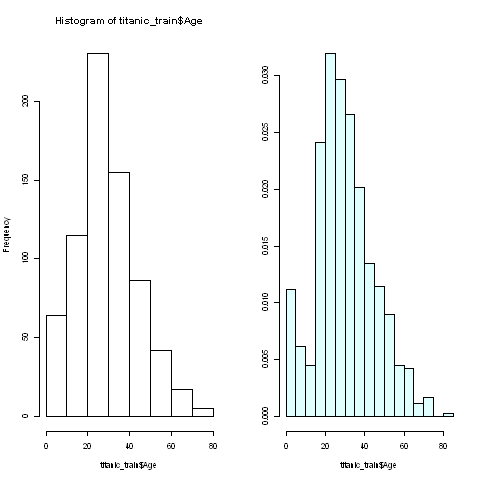

In [194]:
par(mfrow=c(1,2)) #subplots
par(cex=0.4) #control size of labels
hist(titanic_train$Age)
library(MASS)#need for truehist function
truehist(titanic_train$Age, col='lightcyan') #see colors() for built-in colors in R

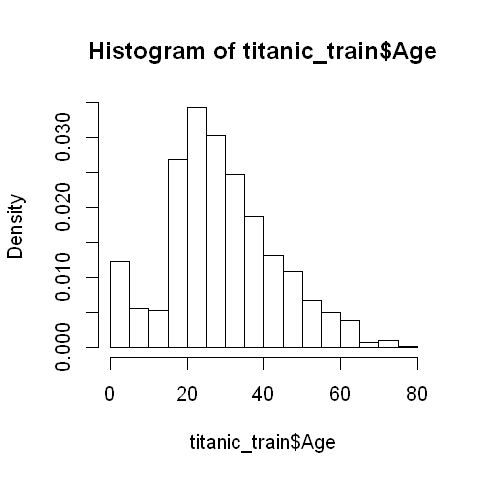

In [195]:
hist(titanic_train$Age, prob=TRUE, breaks="scott")

##### Attaching a data frame

In [196]:
attach(titanic_train)

In [197]:
names(titanic_train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [198]:
print(head(Age))

[1] 22 38 26 35 35 NA


If a data frame is attached, it can be detached when it is no longer needed using the detach function.

In [199]:
detach(titanic_train)
#rm(titanic_train) #remove variable from memory

An alternative to attaching a data frame is (sometimes) to use the with function. It is useful for displaying plots or summary statistics. However, variables created using with are local to it.

In [200]:
#with(titanic_train, expr={Age})


In [201]:
attach(titanic_train)

In [202]:
print(Age)

  [1] 22.00 38.00 26.00 35.00 35.00    NA 54.00  2.00 27.00 14.00  4.00 58.00
 [13] 20.00 39.00 14.00 55.00  2.00    NA 31.00    NA 35.00 34.00 15.00 28.00
 [25]  8.00 38.00    NA 19.00    NA    NA 40.00    NA    NA 66.00 28.00 42.00
 [37]    NA 21.00 18.00 14.00 40.00 27.00    NA  3.00 19.00    NA    NA    NA
 [49]    NA 18.00  7.00 21.00 49.00 29.00 65.00    NA 21.00 28.50  5.00 11.00
 [61] 22.00 38.00 45.00  4.00    NA    NA 29.00 19.00 17.00 26.00 32.00 16.00
 [73] 21.00 26.00 32.00 25.00    NA    NA  0.83 30.00 22.00 29.00    NA 28.00
 [85] 17.00 33.00 16.00    NA 23.00 24.00 29.00 20.00 46.00 26.00 59.00    NA
 [97] 71.00 23.00 34.00 34.00 28.00    NA 21.00 33.00 37.00 28.00 21.00    NA
[109] 38.00    NA 47.00 14.50 22.00 20.00 17.00 21.00 70.50 29.00 24.00  2.00
[121] 21.00    NA 32.50 32.50 54.00 12.00    NA 24.00    NA 45.00 33.00 20.00
[133] 47.00 29.00 25.00 23.00 19.00 37.00 16.00 24.00    NA 22.00 24.00 19.00
[145] 18.00 19.00 27.00  9.00 36.50 42.00 51.00 22.00 55.50 40.5

##### Graficas de dispersión y correlación

In [203]:
attach(titanic_train)

The following objects are masked from titanic_train (pos = 3):

    Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex,
    SibSp, Survived, Ticket



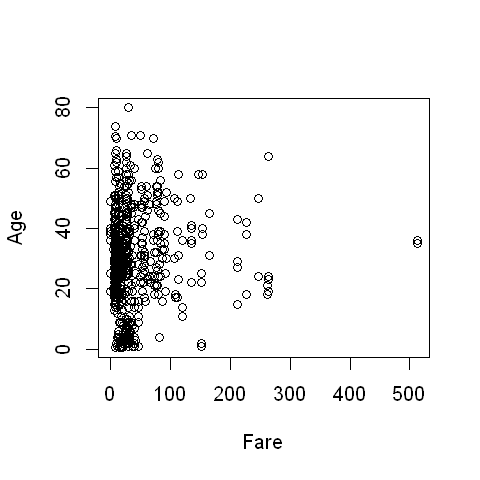

In [204]:
plot(Fare, Age)

No se puede ver correlación entre el monto pagado y la edad.

#### Fin de mi ejemplo
**
---
**
---
---
**
---


## Parte 2: 3_ggplot2

In [205]:
equises_pa_graficar <- seq(0,100,.5) #secuencia de 0 a 100 con espaciado de .5

In [208]:
#?plot

## Base Graphics

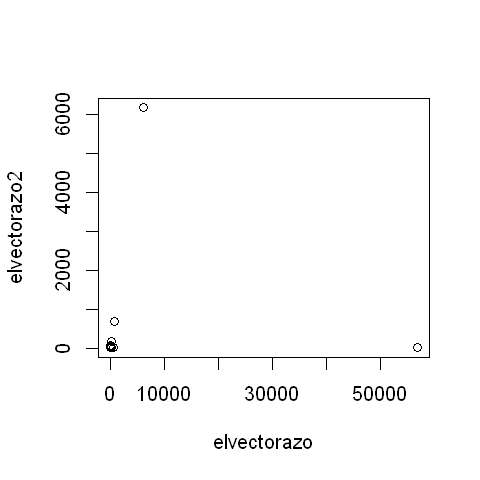

In [209]:
plot(elvectorazo,elvectorazo2)

In [231]:
#?barplot
head(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


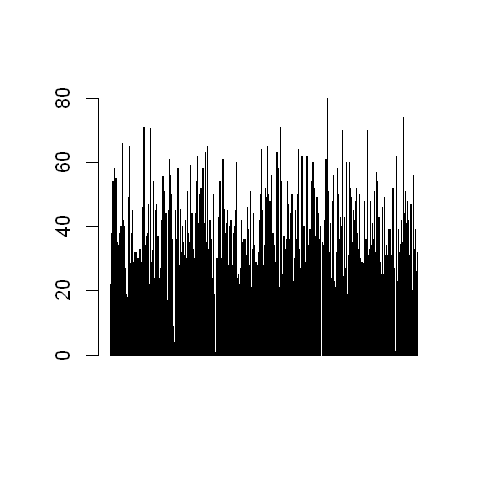

In [222]:
barplot(titanic_train$Age)

In [219]:
#?boxplot

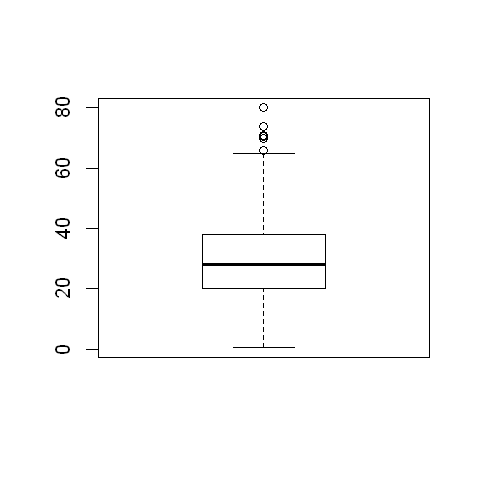

In [221]:
boxplot(titanic_train$Age)

In [ ]:
?hist

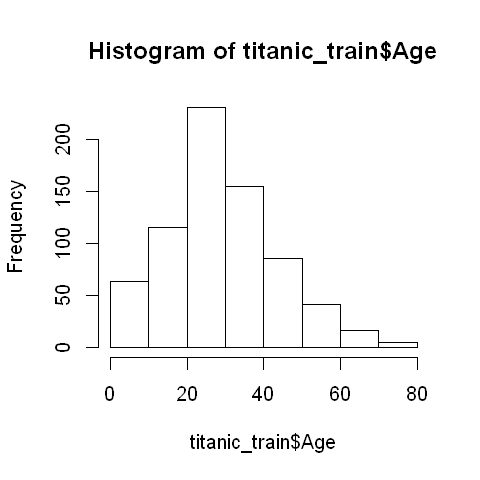

In [241]:
hist(titanic_train$Age)

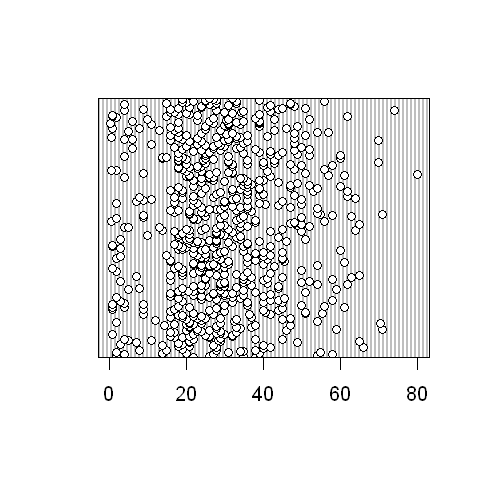

In [237]:
#?dotchart
dotchart(titanic_train$Age)

### GGplot2

In [242]:
library(ggplot2)

In [248]:
ggdatos<-ggplot(data=titanic_train, aes(x=Age, y= Fare))

Warning message:
"Removed 177 rows containing missing values (geom_point)."

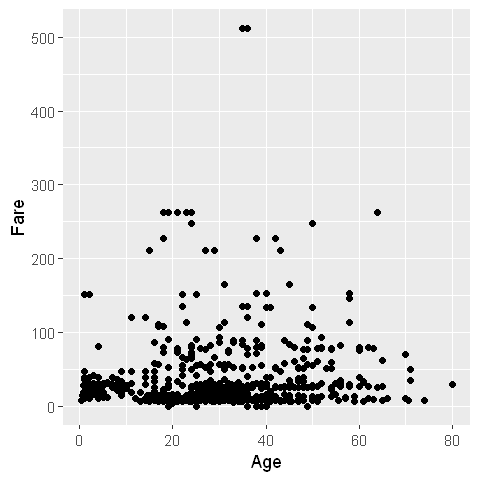

In [249]:
ggdatos + geom_point()

Warning message:
"Removed 177 rows containing missing values (geom_point)."

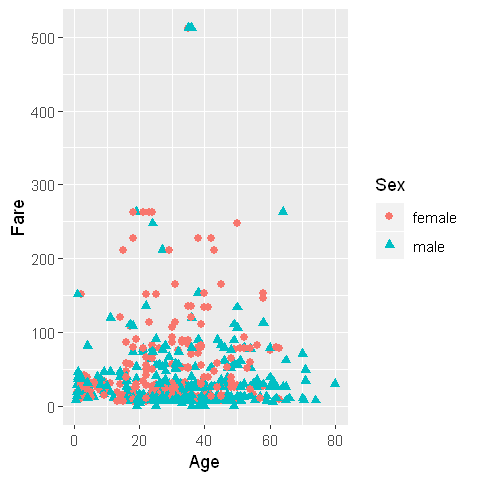

In [253]:
ggdatos+
  geom_point(aes(color= Sex, shape=Sex), size=2)

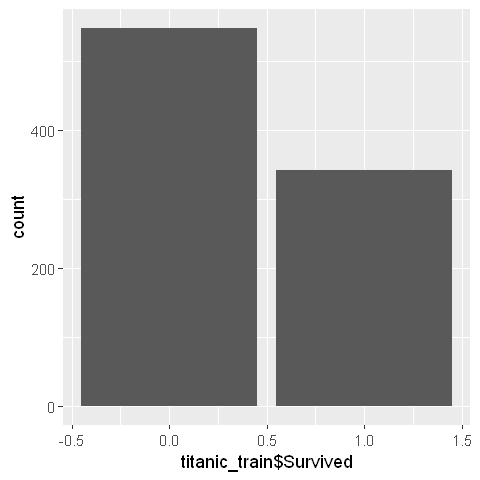

In [259]:
#?geom_col
ggplot(data=titanic_train) + geom_bar(mapping = aes(x=titanic_train$Survived))

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"Warning message:
"Removed 177 rows containing missing values (stat_boxplot)."

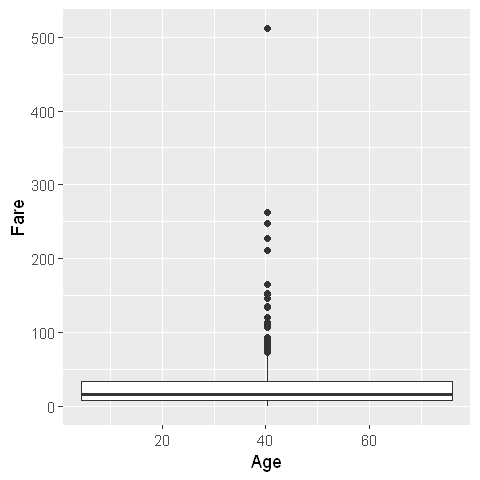

In [260]:
ggdatos + geom_boxplot()

Warning message:
"Removed 177 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 177 rows containing missing values (geom_point)."

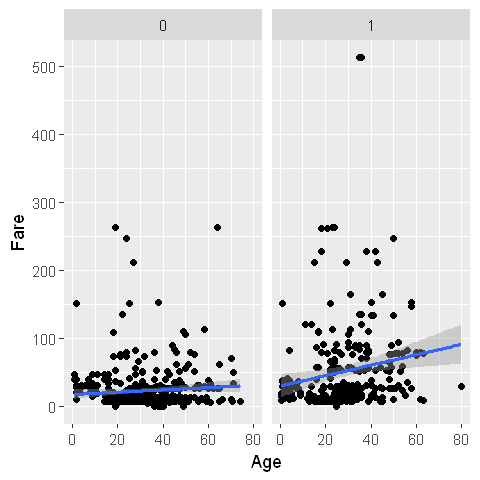

In [261]:
ggdatos + 
  geom_point() +
  facet_grid(. ~ Survived) +
  geom_smooth(method="lm")

Warning message:
"Removed 177 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 177 rows containing missing values (geom_point)."

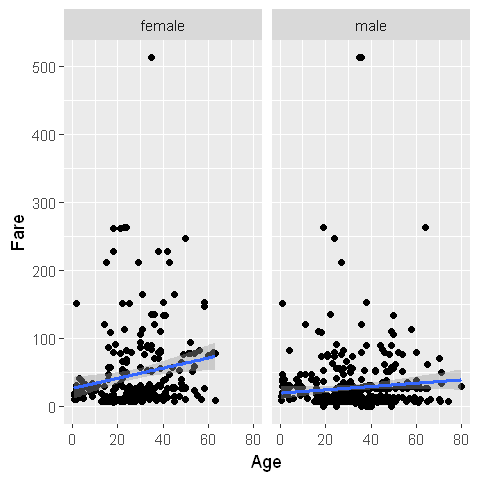

In [263]:
ggdatos + 
  geom_point() +
  facet_wrap(. ~ Sex) +
  geom_smooth(method="lm")